<a href="https://colab.research.google.com/github/FarahRadwan/MachineLearning/blob/main/Logistic_finalll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [ ]:
la=LabelEncoder()
df['type']=la.fit_transform(df['type'])
df['nameOrig']=la.fit_transform(df['nameOrig'])
df['nameDest']=la.fit_transform(df['nameDest'])

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,125164,170136.0,160296.36,274917,0.0,0.0,0,0
1,1,3,1864.28,361319,21249.0,19384.72,286716,0.0,0.0,0,0
2,1,4,181.00,165236,181.0,0.00,73550,0.0,0.0,1,0
3,1,1,181.00,961662,181.0,0.00,65464,21182.0,0.0,1,0
4,1,3,11668.14,567915,41554.0,29885.86,138001,0.0,0.0,0,0


In [ ]:
X=df.drop('isFraud',axis=1)
y=df['isFraud']

In [ ]:
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X)

In [ ]:
df_scaled=pd.DataFrame(x_scaled,columns=X.columns)
df_scaled.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,0.0,0.75,0.000984,0.119395,0.004374,0.004121,0.611424,0.000000,0.0,0.0
1,0.0,0.75,0.000186,0.344666,0.000546,0.000498,0.637665,0.000000,0.0,0.0
2,0.0,1.00,0.000018,0.157620,0.000005,0.000000,0.163577,0.000000,0.0,0.0
3,0.0,0.25,0.000018,0.917340,0.000005,0.000000,0.145594,0.000503,0.0,0.0
4,0.0,0.75,0.001167,0.541740,0.001068,0.000768,0.306919,0.000000,0.0,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25) #0.8*0.25=0.2


print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(y_train.shape))
print("y_val shape: {}".format(y_test.shape))

X_train shape: (629145, 10)
X_test shape: (209715, 10)
y_train shape: (629145,)
y_test shape: (209715,)
X_val shape: (629145,)
y_val shape: (209715,)


In [ ]:
#Logistic Regression withoyt penalty
lr_clf=LogisticRegression(penalty="none")
lr_clf.fit(X_train,y_train)
pred=lr_clf.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print("Accuracy",accuracy*100)
print(classification_report(y_test,pred))
confusion_matrix(y_test,pred)


Accuracy 99.9146460672818
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209464
           1       0.84      0.35      0.50       251

    accuracy                           1.00    209715
   macro avg       0.92      0.68      0.75    209715
weighted avg       1.00      1.00      1.00    209715



array([[209447,     17],
       [   162,     89]], dtype=int64)

In [ ]:
#kfold without penalty
kf = KFold(n_splits=5, shuffle=True, random_state=1)
kfold = []
  
for train_index, test_index in kf.split(X,y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    lr_clf.fit(x_train_fold, y_train_fold)
    kfold.append(lr_clf.score(x_test_fold, y_test_fold))

In [ ]:
kfold

[0.9992513649476671,
 0.9992895119567031,
 0.9993133538373506,
 0.9992609016999261,
 0.9992990487089621]

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
Skfold = []
  
for train_index, test_index in skf.split(X,y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    lr_clf.fit(x_train_fold, y_train_fold)
    Skfold.append(lr_clf.score(x_test_fold, y_test_fold))

In [ ]:
print('Mean of Kfold:',np.mean(kfold))
print('Mean of StratifiedKfold:', np.mean(Skfold))

Mean of Kfold: 0.9992828362301218
Mean of StratifiedKfold: 0.999290465631929


In [ ]:
results = cross_val_score(lr_clf, x_scaled, y, cv=skf) 

In [ ]:
print(np.mean(results))

0.999290465631929


In [ ]:
results_fold= cross_val_score(lr_clf, x_scaled, y, cv=kf)

In [ ]:
print(np.mean(results_fold))

0.9992828362301218


In [ ]:
X_train_str, X_test_str, y_train_str, y_test_str = train_test_split(df_scaled, y, test_size=0.2,stratify=y)
lr_clf=LogisticRegression(penalty="none")
lr_clf.fit(X_train_str,y_train_str)
pred=lr_clf.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print("Accuracy",accuracy*100)
print(classification_report(y_test,pred))
confusion_matrix(y_test,pred)


Accuracy 99.91703025534655
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209464
           1       0.87      0.36      0.51       251

    accuracy                           1.00    209715
   macro avg       0.94      0.68      0.75    209715
weighted avg       1.00      1.00      1.00    209715



array([[209451,     13],
       [   161,     90]], dtype=int64)

In [ ]:
reg_l2=LogisticRegression(penalty="l2")
reg_l2.fit(X_train,y_train)
pred_l2=reg_l2.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print(accuracy)
print(classification_report(y_test,pred_l2))
confusion_matrix(y_test,pred_l2)

0.9991703025534654
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209464
           1       0.96      0.09      0.17       251

    accuracy                           1.00    209715
   macro avg       0.98      0.55      0.58    209715
weighted avg       1.00      1.00      1.00    209715



array([[209463,      1],
       [   228,     23]], dtype=int64)

In [ ]:
results_fold_l2= cross_val_score(reg_l2, x_scaled, y, cv=kf)
print(np.mean(results_fold_l2))

0.9989976873375772


In [ ]:
results_sfold_l2= cross_val_score(reg_l2, x_scaled, y, cv=skf)
print(np.mean(results_sfold_l2))

0.9989967336623513


In [ ]:
reg_l1=LogisticRegression(penalty="l1",solver="liblinear")
reg_l1.fit(X_train,y_train)
pred=reg_l1.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print(accuracy)
print(classification_report(y_test,pred_l2))
confusion_matrix(y_test,pred)

0.9990892401592638
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209464
           1       0.96      0.09      0.17       251

    accuracy                           1.00    209715
   macro avg       0.98      0.55      0.58    209715
weighted avg       1.00      1.00      1.00    209715



array([[209463,      1],
       [   190,     61]], dtype=int64)

In [ ]:
results_fold_l1= cross_val_score(reg_l1, x_scaled, y, cv=kf)
print(np.mean(results_fold_l2))

0.9989976873375772


In [ ]:
results_sfold_l1= cross_val_score(reg_l1, x_scaled, y, cv=skf)
print(np.mean(results_sfold_l2))

0.9989967336623513


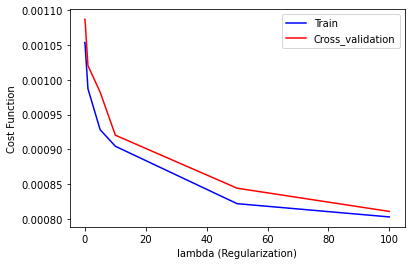

In [ ]:
#l2 =Ridge
predict_val=[]
predict_train=[]
min=[]
C_param_range = [0.001,0.01,0.1,1,5,10,50,100]
for i in C_param_range:
    lr_clf=LogisticRegression(C=i)
    lr_clf.fit(X_train,y_train)
    pred_val=lr_clf.predict(X_val)
    accuracy_val=accuracy_score(y_val,pred_val)
    err_val=1-accuracy_val
    predict_val.append(1-accuracy_val)
    
    pred_train=lr_clf.predict(X_train)
    accuracy_train=accuracy_score(y_train,pred_train)
    predict_train.append(1-accuracy_train)


    
fig, ax = plt.subplots()
ax.plot(C_param_range, predict_train, '-b', label='Train')
ax.plot(C_param_range, predict_val, '-r', label='Cross_validation')
plt.xlabel("lambda (Regularization)")
plt.ylabel("Cost Function")
leg = ax.legend();

In [ ]:
best_lambda=C_param_range[np.argmin(predict_val)]
best_lambda

100

In [ ]:
best_lambda=C_param_range[np.argmin(predict_val)]
lr_clf=LogisticRegression(C=best_lambda)
lr_clf.fit(X_train,y_train)
pred_ridge=lr_clf.predict(X_test)
accuracy_ridge=accuracy_score(y_test,pred_ridge)
print(accuracy_ridge)
print(classification_report(y_test,pred_ridge))
confusion_matrix(y_test,pred_ridge)

0.9990701666547457
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209464
           1       0.98      0.23      0.37       251

    accuracy                           1.00    209715
   macro avg       0.99      0.61      0.68    209715
weighted avg       1.00      1.00      1.00    209715



array([[209463,      1],
       [   194,     57]], dtype=int64)

In [ ]:
results_fold_ridge= cross_val_score(lr_clf, x_scaled, y, cv=kf)
print(np.mean(results_fold_ridge))

0.999184607681854


In [ ]:
results_sfold_ridge= cross_val_score(lr_clf, x_scaled, y, cv=skf)
print(np.mean(results_sfold_ridge))

0.9991807929809504


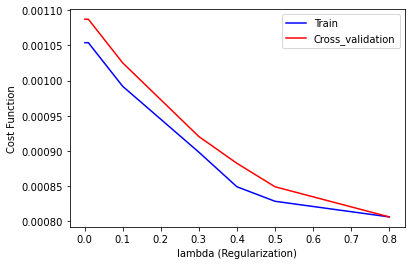

In [ ]:
predict_val=[]
predict_train=[]
min=[]
C_param_range = [0.001,0.01,0.1,0.3,0.4,0.5,0.8]
for i in C_param_range:
    lr_clf_lasso=LogisticRegression(penalty="l1",solver="liblinear",C=i)
    lr_clf_lasso.fit(X_train,y_train)
    pred_val=lr_clf_lasso.predict(X_val)
    accuracy_val=accuracy_score(y_val,pred_val)
    err_val=1-accuracy_val
    predict_val.append(1-accuracy_val)
    
    pred_train=lr_clf_lasso.predict(X_train)
    accuracy_train=accuracy_score(y_train,pred_train)
    predict_train.append(1-accuracy_train)


    
fig, ax = plt.subplots()
ax.plot(C_param_range, predict_train, '-b', label='Train')
ax.plot(C_param_range, predict_val, '-r', label='Cross_validation')
plt.xlabel("lambda (Regularization)")
plt.ylabel("Cost Function")
leg = ax.legend();

In [ ]:
best_lambda=C_param_range[np.argmin(predict_val)]
best_lambda

0.8

In [ ]:
best_lambda=C_param_range[np.argmin(predict_val)]
lr_clf_lasso=LogisticRegression(C=best_lambda)
lr_clf_lasso.fit(X_train,y_train)
pred_lasso=lr_clf_lasso.predict(X_test)
accuracy_lasso=accuracy_score(y_test,pred_lasso)
print(accuracy_lasso)
print(classification_report(y_test,pred_lasso))
confusion_matrix(y_test,pred_lasso)

0.9989080418663424
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209464
           1       0.96      0.09      0.17       251

    accuracy                           1.00    209715
   macro avg       0.98      0.55      0.58    209715
weighted avg       1.00      1.00      1.00    209715



array([[209463,      1],
       [   228,     23]], dtype=int64)

In [ ]:
results_fold_lasso= cross_val_score(lr_clf_lasso, x_scaled, y, cv=kf)
print(np.mean(results_fold_lasso))

0.9989910116109959


In [ ]:
results_sfold_lasso= cross_val_score(lr_clf_lasso, x_scaled, y, cv=skf)
print(np.mean(results_sfold_lasso))

0.9989891042605441


In [ ]:
predict_val=[]
predict_train=[]
min=[]
scores_val=[]
C_param_range = [0.001,0.01,0.1,1,5,10,100,500]
for i in C_param_range:
    lr_clf=LogisticRegression(penalty="l1",solver="liblinear",C=i)
    lr_clf.fit(X_train,y_train)
    pred_val=lr_clf.predict(X_val)
    accuracy_val=accuracy_score(y_val,pred_val)
    err_val=1-accuracy_val
    predict_val.append(1-accuracy_val)
    
    pred_train=lr_clf.predict(X_train)
    accuracy_train=accuracy_score(y_train,pred_train)
    predict_train.append(1-accuracy_train)
    score=cross_val_score(lr_clf,x_scaled,y,cv=skf)
    mean_score=np.mean(score)
    scores_val.append(mean_score)


    
print("Max Accuracy:",np.max(scores_val))
print("best_alpha",C_param_range[np.argmax(scores_val)])

Max Accuracy: 0.9993028634098657
best_alpha 500


In [ ]:
lr_clf=LogisticRegression(penalty="l1",solver="liblinear",C=500)
lr_clf.fit(X_train,y_train)
pred_test=lr_clf.predict(X_test)
accuracy_val=accuracy_score(y_test,pred_test)
print(classification_report(y_test,pred_test))
confusion_matrix(y_test,pred_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209464
           1       0.88      0.37      0.52       251

    accuracy                           1.00    209715
   macro avg       0.94      0.68      0.76    209715
weighted avg       1.00      1.00      1.00    209715



array([[209451,     13],
       [   159,     92]], dtype=int64)

In [ ]:
predict_val=[]
predict_train=[]
min=[]
scores_val=[]
C_param_range = [0.001,0.01,0.1,1,5,10,100,500]
for i in C_param_range:
    lr_clf=LogisticRegression(penalty="l2",C=i)
    lr_clf.fit(X_train,y_train)
    pred_val=lr_clf.predict(X_val)
    accuracy_val=accuracy_score(y_val,pred_val)
    err_val=1-accuracy_val
    predict_val.append(1-accuracy_val)
    
    pred_train=lr_clf.predict(X_train)
    accuracy_train=accuracy_score(y_train,pred_train)
    predict_train.append(1-accuracy_train)
    score=cross_val_score(lr_clf,x_scaled,y,cv=skf)
    mean_score=np.mean(score)
    scores_val.append(mean_score)


    
print("Max Accuracy:",np.max(scores_val))
print("best_alpha",C_param_range[np.argmax(scores_val)])

Max Accuracy: 0.9992284767422455
best_alpha 500


In [ ]:
lr_clf=LogisticRegression(penalty="l2",C=500)
lr_clf.fit(X_train,y_train)
pred_test=lr_clf.predict(X_test)
accuracy_val=accuracy_score(y_test,pred_test)
print(classification_report(y_test,pred_test))
confusion_matrix(y_test,pred_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209464
           1       0.96      0.26      0.41       251

    accuracy                           1.00    209715
   macro avg       0.98      0.63      0.71    209715
weighted avg       1.00      1.00      1.00    209715



array([[209461,      3],
       [   185,     66]], dtype=int64)